# Basic classification

This guide use tf.keras API to train a simple neural network for clothing image classification.

In [8]:
import tensorflow as tf
from tensorflow.python.keras import layers
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


## The Fashion MNIST dataset

### Import the dataset

This guide use the Fashion MNIST dataset, which contains 70,000 grayscale images (having low resolution 28x28 pixels) in 10 categories.

The Fashion MNIST dataset will be split into 60,000 images for training network and 10,000 images for evaluate how accurtely the network
learned to classify images.

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The images are 28x28 NumPy arrays, with pixel values range between 0 to 255. The labels are an array of integers, ranging from 0 to 9.

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess the data

The data must be preprocessed before training the network.

First, we will see the pixel values in range of 0 to 255 

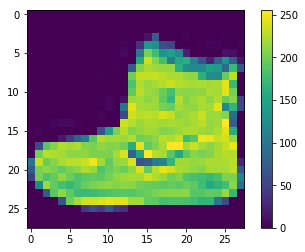

In [3]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

Before feeding to the neural network model, we scale data values to range of 0 to 1.

In [4]:
train_data = train_data / 255.0
test_data = test_data / 255.0

Now, we can display images to verify data to be in correct format.

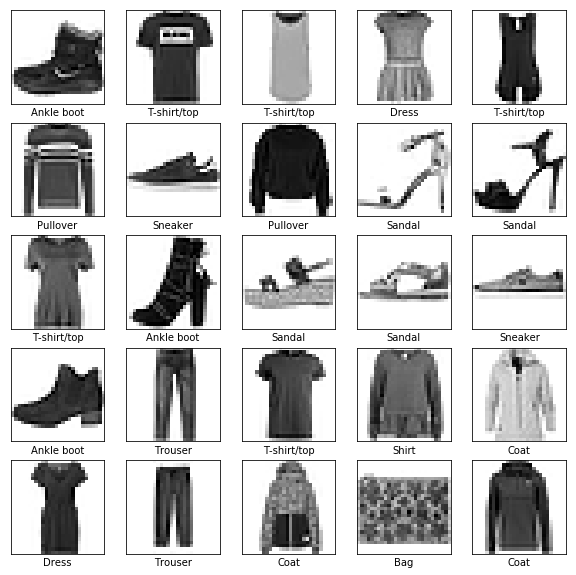

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_data[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

### Setup the layers
To build the neural network, first we need to configure the layers of the model.

This model contains 1 fully connected layers with Relu activation function, 
the output layer is also fully connected layer with softmax activation function, and
the input is flatten from 2D image to array. 

In [9]:
model = tf.keras.Sequential()
model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(10, activation=tf.nn.softmax))

print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

Before training the model, we need to setup some learning schemes:
- Loss function: measures how accurate the model is during training.
- Optimizer: the way that how the model is updated based on the data and minimize loss function.
- Metrics: used to monitors the training and testing steps. 

In [11]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Train the model

Training the neural network mode requires the following steps:
1. Feed the training data to model.
2. The model learns to associate images and labels.
3. Make the model to make predictions about a test set.

To start training, call fit method to train data.

In [12]:
model.fit(train_data, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 115us/sample - loss: 0.4963 - acc: 0.8245
Epoch 2/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.3744 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.3347 - acc: 0.8784
Epoch 4/5
60000/60000 [==============================] - 9s 158us/sample - loss: 0.3107 - acc: 0.8857
Epoch 5/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2933 - acc: 0.8914


As the model trains, the loss and accuracy metrics are displayed. 
This model reaches an accuracy of about 0.88 on training data.

### Evaluate accuracy

Next, compare how the model performs on the test dataset

In [13]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.3458 - acc: 0.8737
Test accuracy: 0.8737


It turns out, the accuracy on the test dataset is a little less than the accuracy on the training dataset. 
This gap between training accuracy and test accuracy is an example of overfitting. 
Overfitting is when a machine learning model performs worse on new data than on their training data.

### Make predictions

With the trained model, we can use it to make predictions about some images.

In [14]:
predictions = model.predict(test_data)

# print first prediction
print(predictions[0])

[2.0134776e-05 1.6932154e-07 2.6746932e-06 4.6629143e-08 1.1465662e-06
 5.7912633e-02 1.7369737e-06 4.9062766e-02 8.5010488e-06 8.9299023e-01]


A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing. 
We can see which label has the highest confidence value.

In [15]:
np.argmax(predictions[0])

9

Now, we will check the test label to see the prediction is true.

In [16]:
test_labels[0]

9

We can graph this to look at the full set of 10 channels.

In [27]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label], 
                                        100*np.argmax(predictions_array), 
                                        class_names[true_label]), 
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Look prediction of 0th image.

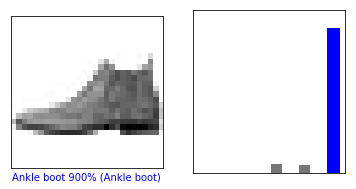

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_data)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

Let's plot several images with their predictions.

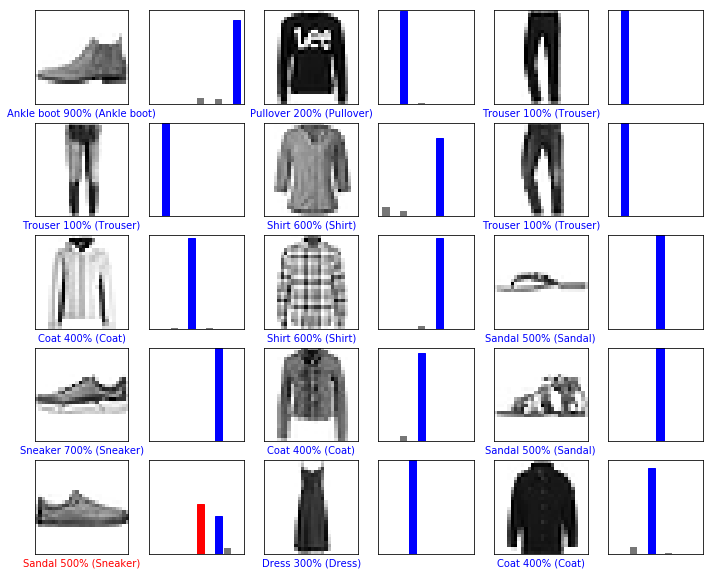

In [31]:
# plot the first X test images, their predicted label, and the true label
# color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_cols*num_rows
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_image(i, predictions, test_labels, test_data)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_value_array(i, predictions, test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [32]:
img = test_data[0]
print(img.shape)

# add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))
print(img.shape)

# make the prediction on image
prediction = model.predict(img)
print(prediction)

(28, 28)
(1, 28, 28)
[[2.0134776e-05 1.6932154e-07 2.6746904e-06 4.6629321e-08 1.1465629e-06
  5.7912622e-02 1.7369737e-06 4.9062781e-02 8.5010570e-06 8.9299023e-01]]


Plot the prediction of image.

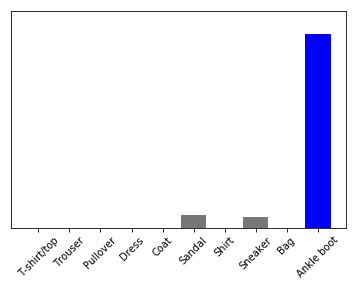

In [33]:
plot_value_array(0, prediction, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

The final prediction of the image will be label of 9.

In [34]:
np.argmax(prediction[0])


9